In [915]:
# Data Manipulation.
import pandas as pd
import numpy as np

# Data Visualization.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Imputer 
from sklearn.impute import KNNImputer

# DS Division.
from sklearn.model_selection import train_test_split

# Data Balancing.
from imblearn.over_sampling import SMOTE

# Classifier Models.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Precision Metrics.
from sklearn.metrics import f1_score

# Save Models.
from joblib import dump, load
import joblib

# Warnings.
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Color Palette.
palette = sns.husl_palette(h=.5)
palette_matrix = sns.color_palette("light:#5A9", as_cmap=True)

In [916]:
# The data is converted to a dataframe.
df_ori = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [917]:
df_ori.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [918]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [919]:
# Drop ID
df_ori.drop('id', axis=1, inplace=True)

In [920]:
df_median = df_ori.copy()

Metode Isi Null Dengan Median

In [921]:
df_median.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [922]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [923]:
df_median.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [924]:
median_bmi = df_median['bmi'].median()
df_median['bmi'].fillna(median_bmi, inplace=True)

In [925]:
df_median.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

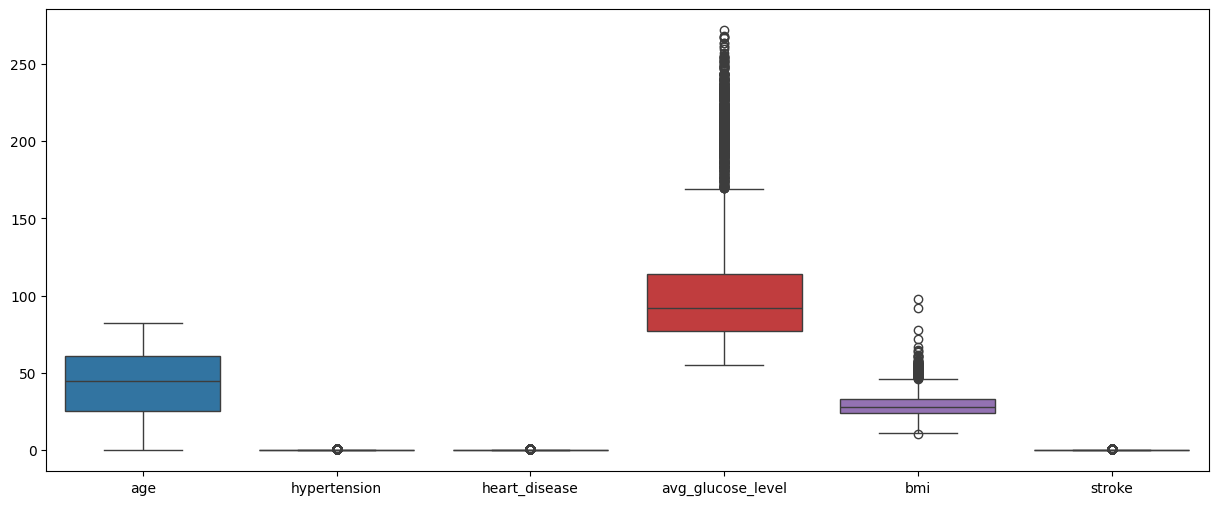

In [926]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_median)
plt.show()

In [927]:
df_median['work_type']= df_median['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
df_median['gender'] = df_median['gender'].map({'Male':0, 'Female':1, 'Other':2})
df_median['Residence_type'] = df_median['Residence_type'].map({'Urban':0, 'Rural':1})
df_median['smoking_status'] = df_median['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df_median['ever_married'] = df_median['ever_married'].map({'Yes':1, 'No':0})

In [928]:
df_m = df_median.copy()
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [929]:
df_eda = df_median.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


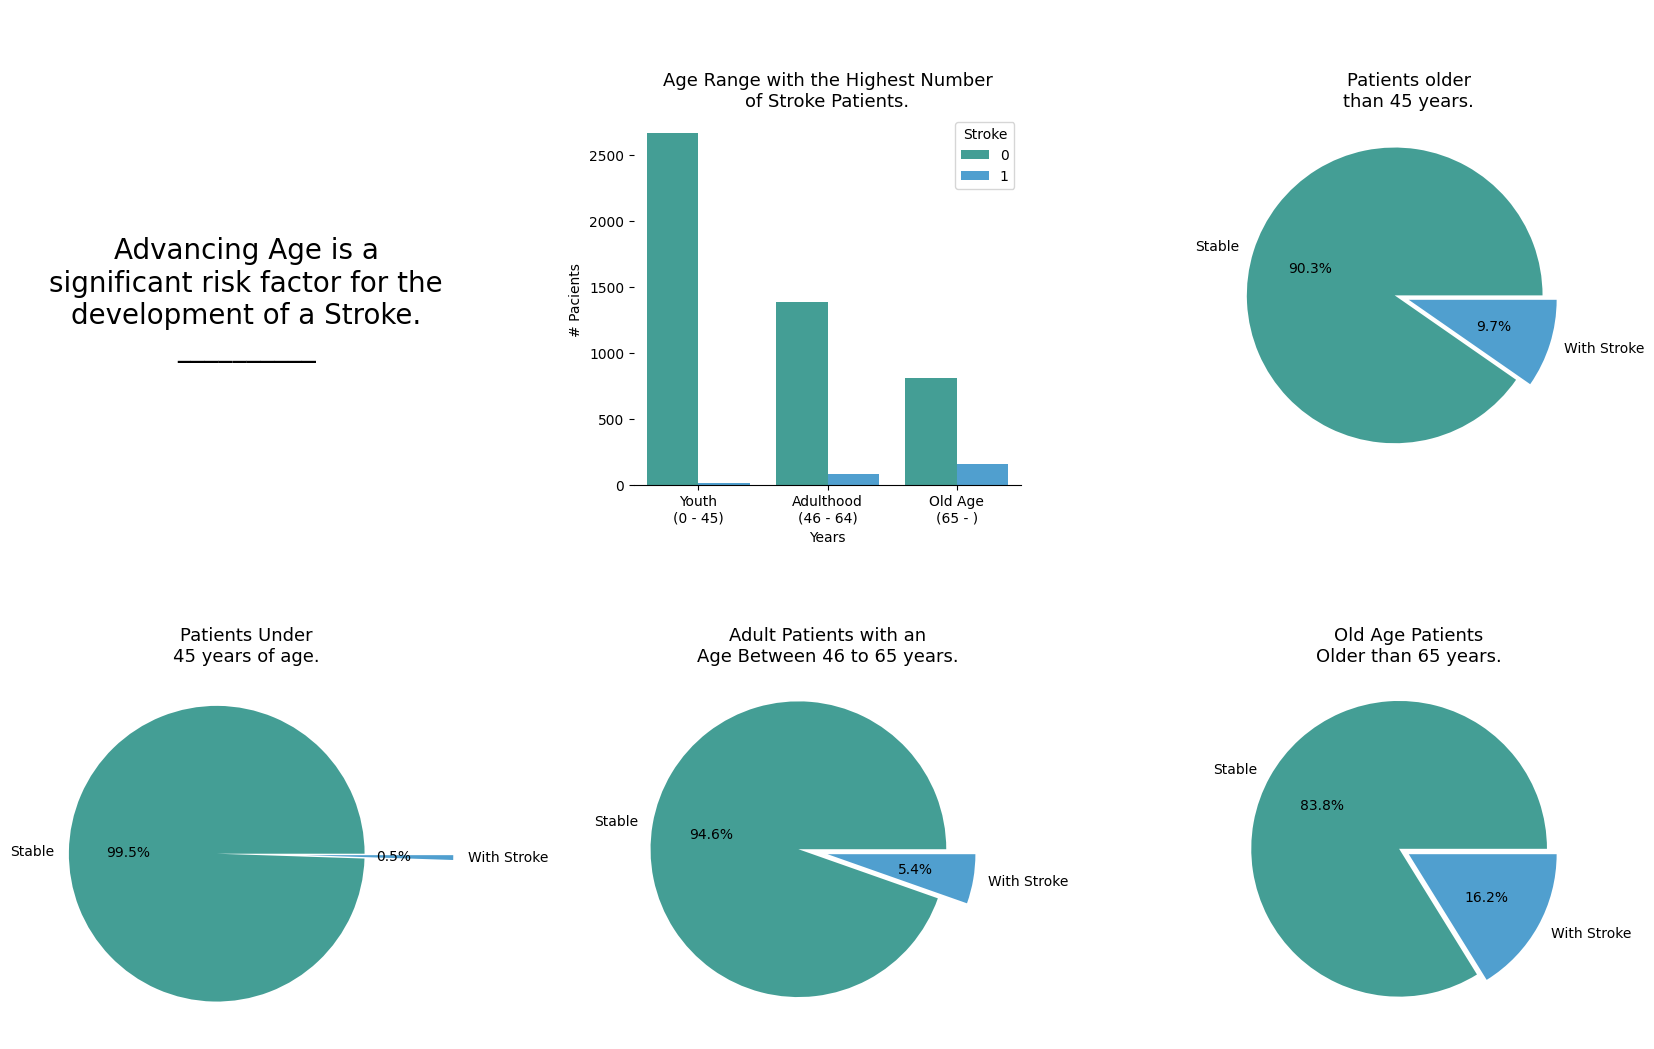

In [930]:
# DF of patients categorized by age range.
df_eda['age_range'] = pd.cut(df_eda['age'], bins=[0, 46, 65, np.inf], include_lowest=True,
                             labels=["Youth\n(0 - 45)", "Adulthood\n(46 - 64)", "Old Age\n(65 - )"])

df_eda['old_age'] = pd.cut(df_eda['age'], bins=[0, 46, np.inf], include_lowest=True,
                             labels=["Youth", "Adulthood & Old Age"])

# Adulthood & Old Age.
adul_old = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age") & (df_eda['stroke'] == 0)])
adul_old_stroke = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age") & (df_eda['stroke'] == 1)])
adul_old_total = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age")])
adul_old = round((adul_old / adul_old_total) * 100, 2)
adul_old_stroke = round((adul_old_stroke / adul_old_total) * 100, 2)
patients_adul_old = [adul_old, adul_old_stroke]

# Youth.
youth = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)") & (df_eda['stroke'] == 0)])
youth_stroke = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)") & (df_eda['stroke'] == 1)])
youth_total = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)")])
youth = round((youth / youth_total) * 100, 2)
youth_stroke = round((youth_stroke / youth_total) * 100, 2)
patients_youth = [youth, youth_stroke]

# Adulthood.
adul = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)") & (df_eda['stroke'] == 0)])
adul_stroke = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)") & (df_eda['stroke'] == 1)])
adul_total = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)")])
adul = round((adul / adul_total) * 100, 2)
adul_stroke = round((adul_stroke / adul_total) * 100, 2)
patients_adul = [adul, adul_stroke]

# Old Age.
old = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )") & (df_eda['stroke'] == 0)])
old_stroke = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )") & (df_eda['stroke'] == 1)])
old_total = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )")])
old = round((old / old_total) * 100, 2)
old_stroke = round((old_stroke / old_total) * 100, 2)
patients_old = [old, old_stroke]

# Plot
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.5)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Advancing Age is a\nsignificant risk factor for the\ndevelopment of a Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Age Range.
ax1 = fig.add_subplot(gs[0,1])
ax1 = sns.countplot(data=df_eda, x='age_range', hue='stroke', palette=palette, ax=ax1)
ax1.set_title(f"\n\n\nAge Range with the Highest Number\nof Stroke Patients.", fontsize=13)
ax1.legend(title='Stroke')
ax1.spines[['top', 'right', 'left']].set_visible(False)
ax1.set_xlabel('Years')
ax1.set_ylabel('# Pacients')

# Plot Adul Old.
ax2 = fig.add_subplot(gs[0, 2])
ax2 = plt.pie(patients_adul_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("Patients older\nthan 45 years.", fontsize=13)

# Plot Youth.
ax2 = fig.add_subplot(gs[1, 0])
ax2 = plt.pie(patients_youth, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0.4], colors = ['#449E95', '#509FCF'])
plt.title("Patients Under\n45 years of age.", fontsize=13)

# Plot Adul.
ax2 = fig.add_subplot(gs[1, 1])
ax2 = plt.pie(patients_adul, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("Adult Patients with an\nAge Between 46 to 65 years.", fontsize=13)

# Plot Old.
ax2 = fig.add_subplot(gs[1, 2])
ax2 = plt.pie(patients_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.075, 0], colors = ['#449E95', '#509FCF'])
plt.title("Old Age Patients\nOlder than 65 years.", fontsize=13)

plt.show()

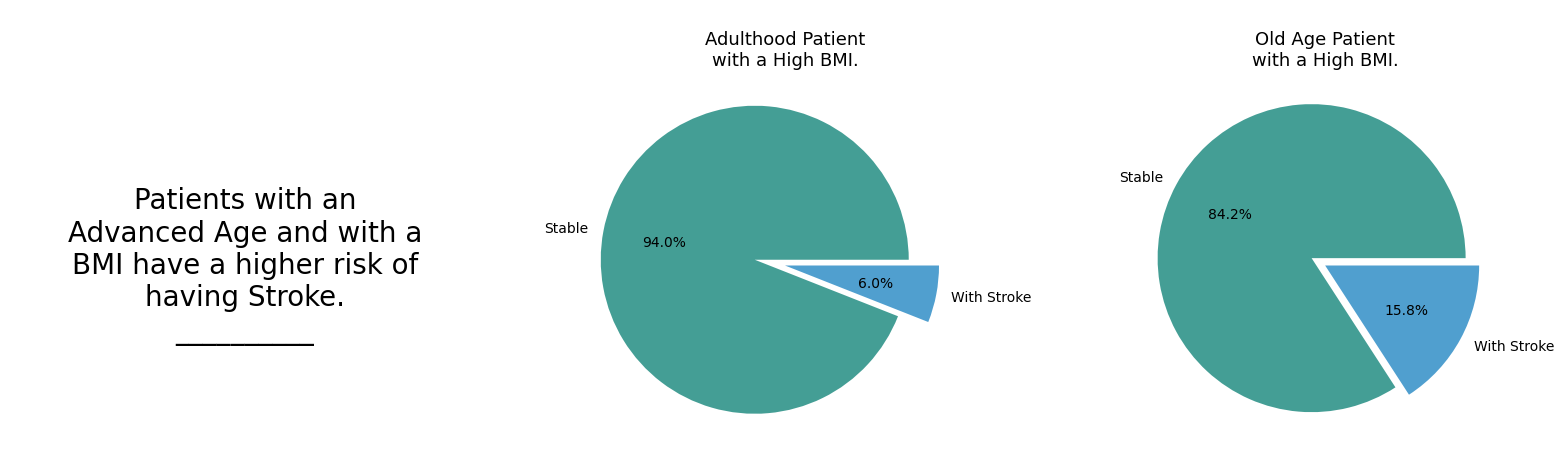

In [931]:
# DF of Patients categorized by their high BMI
df_eda['high BMI'] = pd.cut(df_eda['bmi'], bins=[0, 18.5, 24.9, np.inf], include_lowest=True,
                            labels=["Below Average", "Normal", "High BMI"])

# Adulthood.
adul_h_AgeBMI = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
adul_h_AgeBMI_stroke = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
adul_h_AgeBMI_total = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI')])
adul_h_AgeBMI = round((adul_h_AgeBMI / adul_h_AgeBMI_total) * 100, 2)
adul_h_AgeBMI_stroke = round((adul_h_AgeBMI_stroke / adul_h_AgeBMI_total) * 100, 2)
pacients_adul_h_AgeBMI_total = [adul_h_AgeBMI, adul_h_AgeBMI_stroke]

# Old Age.
old_h_AgeBMI = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
old_h_AgeBMI_stroke = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
old_h_AgeBMI_total = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI')])
old_h_AgeBMI = round((old_h_AgeBMI / old_h_AgeBMI_total) * 100, 2)
old_h_AgeBMI_stroke = round((old_h_AgeBMI_stroke / old_h_AgeBMI_total) * 100, 2)
pacients_old_h_AgeBMI = [old_h_AgeBMI, old_h_AgeBMI_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with an\nAdvanced Age and with a\nBMI have a higher risk of\nhaving Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Adulthood.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(pacients_adul_h_AgeBMI_total, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nAdulthood Patient\nwith a High BMI.", fontsize=13)

# Plot Old.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(pacients_old_h_AgeBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nOld Age Patient\nwith a High BMI.", fontsize=13)

plt.show()

In [932]:
# # DF of Patients categorized by their BMI
# df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], include_lowest=True,
#                             labels=["Below Average", "Normal", "Weight Above", "Obesity"])                           

# # Smoke Status Stroke.
# smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'smoke') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 1)])
# f_smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 1)])
# no_smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 1)])

# # Formerly Smokes.
# f_smokes = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 0)])
# f_smokes_stroke = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 1)])
# f_smokes_total = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['bmi_cat'] == 'High BMI')])

# f_smokes = round((f_smokes / f_smokes_total) * 100, 2)
# f_smokes_stroke = round((f_smokes_stroke / f_smokes_total) * 100, 2)
# f_smoke_highBMI = [f_smokes, f_smokes_stroke]

# # No Smokes.
# no_smokes = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 0)])
# no_smokes_stroke = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['bmi_cat'] == 'High BMI') & (df_eda['stroke'] == 1)])
# no_smokes_total = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['bmi_cat'] == 'High BMI')])

# no_smoke = round((no_smokes / no_smokes_total) * 100, 2)
# no_smokes_stroke = round((no_smokes_stroke / no_smokes_total) * 100, 2)
# no_smoke_highBMI = [no_smoke, no_smokes_stroke]

# # Plots
# fig = plt.figure(figsize=(20,10))
# gs = fig.add_gridspec(2,3) 
# gs.update(wspace=0.5, hspace=1)

# # Plot Title High BMI
# ax0 = fig.add_subplot(gs[0,0])
# ax0.text(0.5,0.5,'\nSmokers with a\nHigh BMI have a higher\nrisk of having a Stroke.\n__________',
#          fontsize=20, horizontalalignment='center', verticalalignment='center')
# ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
# ax0.tick_params(left=False, bottom=False)
# ax0.set_xticklabels([])
# ax0.set_yticklabels([])

# # Plot
# ax1 = fig.add_subplot(gs[0,1])
# ax1 = sns.countplot(data=df_eda, x='bmi_cat', hue='stroke', palette=palette)
# ax1.set_title(f"\nBMI of Patients with Stroke\n\n", fontsize=13)
# ax1.legend(title='Stroke')
# ax1.spines[['top', 'right', 'left']].set_visible(False)
# ax1.set_xlabel('BMI')
# ax1.set_ylabel('# Patients')

# # Plot Smoke Status Stroke.
# ax2 = fig.add_subplot(gs[0,2])
# ax2 = plt.pie([smokes_stroke_len,f_smokes_stroke_len, no_smokes_stroke_len], autopct='%1.1f%%', explode=[0, 0.05, 0],
#               labels = ['Smoke', 'Formely Smoked', 'Never Smoked'], colors = ['#D37EE3', '#449E95', '#509FCF'])
# plt.title("\nSmoking in patients with\nhigh BMI and who have a stroke.\n", fontsize=13)

# # Plot Title Smoke
# ax3 = fig.add_subplot(gs[1,0])
# ax3.text(0.5,0.5,'There are no\nPatients with High BMI\nconsidered Smokers who\nhave had a Stroke.\n',
#          fontsize=16, horizontalalignment='center', verticalalignment='center')
# ax3.spines[["bottom", "top", "left", "right"]].set_visible(False)
# ax3.tick_params(left=False, bottom=False)
# ax3.set_xticklabels([])
# ax3.set_yticklabels([])

# # Plot Formerly Smokes.
# ax4 = fig.add_subplot(gs[1,1])
# ax4 = plt.pie(f_smoke_highBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
# plt.title("Patients who\nSmoked with a High BMI.", fontsize=13)

# # Plot No Smokes.
# ax5 = fig.add_subplot(gs[1,2])
# ax5 = plt.pie(no_smoke_highBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
# plt.title("Non-smokers\nwith a High BMI.", fontsize=13)

# plt.show()

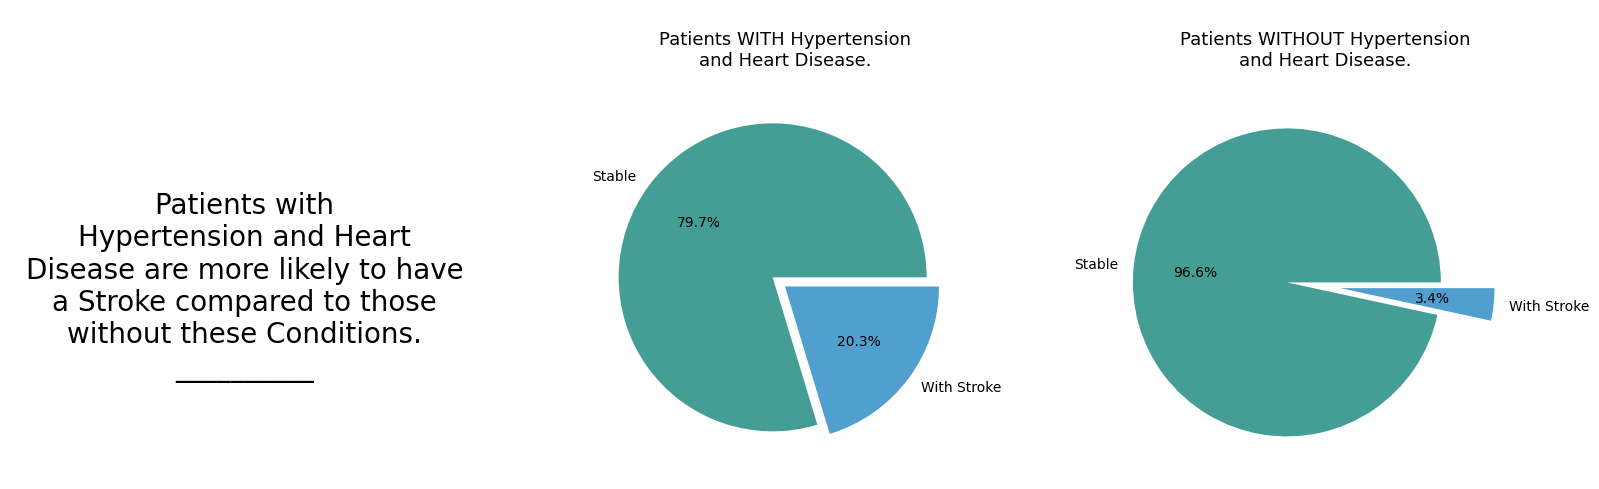

In [933]:
# With.
with_hh = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1) & (df_eda['stroke'] == 0)])
with_hh_stroke = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1) & (df_eda['stroke'] == 1)])
with_hh_total = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1)])
with_hh = round((with_hh / with_hh_total) * 100, 2)
with_hh_stroke = round((with_hh_stroke / with_hh_total) * 100, 2)
patients_with_hh = [with_hh, with_hh_stroke]

# Without.
without_hh = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0) & (df_eda['stroke'] == 0)])
without_hh_stroke = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0) & (df_eda['stroke'] == 1)])
without_hh_total = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0)])
without_hh = round((without_hh / without_hh_total) * 100, 2)
without_hh_stroke = round((without_hh_stroke / without_hh_total) * 100, 2)
patients_without_hh = [without_hh, without_hh_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with\nHypertension and Heart\nDisease are more likely to have\na Stroke compared to those\nwithout these Conditions.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot With.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_with_hh, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients WITH Hypertension\nand Heart Disease.\n", fontsize=13)

# Plot Without.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_without_hh, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.25, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients WITHOUT Hypertension\nand Heart Disease.\n", fontsize=13)

plt.show()

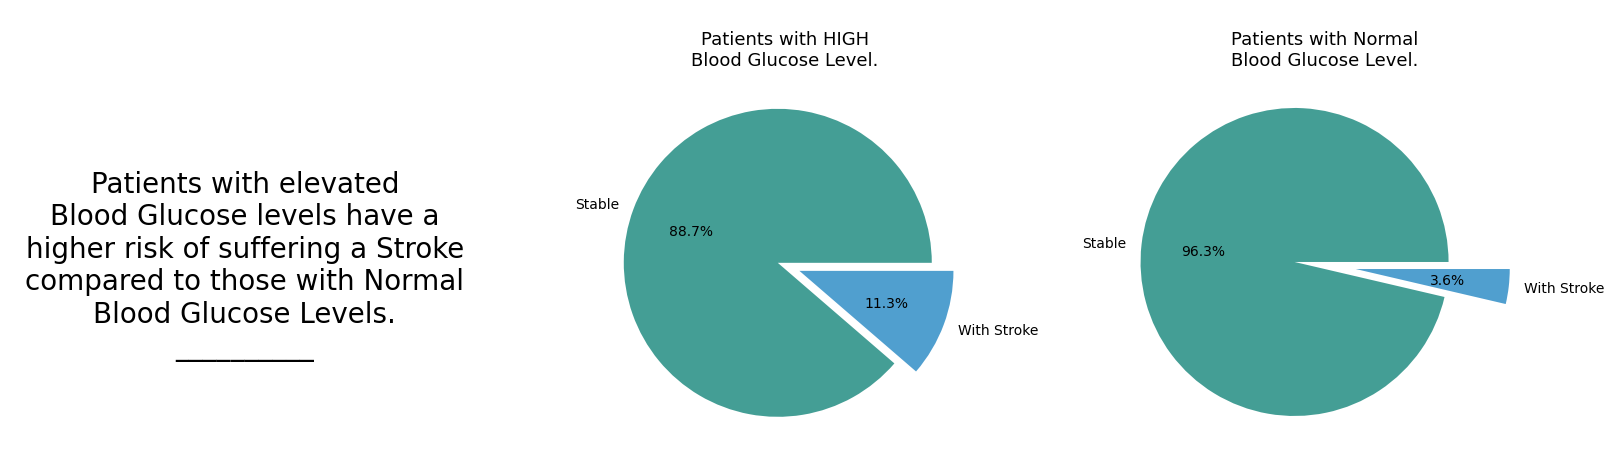

In [934]:
df_eda['avg_gluc_lvl_range'] = pd.cut(df_eda['avg_glucose_level'], bins=[0, 70, 140, np.inf], include_lowest=True,
                                          labels=["Low Level", "Normal Level", "High Level"])

# High. 
high = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level') & (df_eda['stroke'] == 0)])
high_stroke =  len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level') & (df_eda['stroke'] == 1)])
high_total = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level')])
high = round((high / high_total) * 100, 2)
high_stroke = round((high_stroke / high_total) * 100, 2)
patients_high = [high, high_stroke]

# Normal.
normal = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level') & (df_eda['stroke'] == 0)])
normal_stroke = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level') & (df_eda['stroke'] == 1)])
normal_total = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level')])
normal = round((normal / normal_total) * 100, 2)
normal_stroke = round((normal_stroke / normal_total) * 100, 2)
patients_normal = [normal, normal_stroke]

# Plot.
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title.
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with elevated\nBlood Glucose levels have a\nhigher risk of suffering a Stroke\ncompared to those with Normal\nBlood Glucose Levels.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot High.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_high, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.05, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients with HIGH\nBlood Glucose Level.", fontsize=13)

# Plot Low.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_normal, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0.2], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients with Normal\nBlood Glucose Level.", fontsize=13)

plt.show()

In [935]:
# # Female
# female = len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 0)])
# female_stroke =  len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 1)])
# female_total = len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes')])
# female = round((female / female_total) * 100, 2)
# female_stroke = round((female_stroke / female_total) * 100, 2)
# patients_female = [female, female_stroke]

# # Male
# male = len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 0)])
# male_stroke =  len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 1)])
# male_total = len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes')])
# male = round((male / male_total) * 100, 2)
# male_stroke = round((male_stroke / male_total) * 100, 2)
# patients_male = [male, male_stroke]

# # Plot
# fig = plt.figure(figsize=(20,5))
# gs = fig.add_gridspec(1,3)
# gs.update(wspace=0.15)

# # Plot Title
# ax0 = fig.add_subplot(gs[0,0])
# ax0.text(0.5,0.5,'Married Men\nhave an increased\nrisk of having a Stroke\nthan Married Women\n__________',
#          fontsize=20, horizontalalignment='center', verticalalignment='center')
# ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
# ax0.tick_params(left=False, bottom=False)
# ax0.set_xticklabels([])
# ax0.set_yticklabels([])

# # Plot High.
# ax1 = fig.add_subplot(gs[0,1])
# ax1 = plt.pie(patients_female, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
# plt.title("\nMarried Male Patients.", fontsize=13)

# # Plot Low.
# ax0 = fig.add_subplot(gs[0,2])
# ax0 = plt.pie(patients_male, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
# plt.title("\nMarried Female Patients", fontsize=13)

# plt.show()

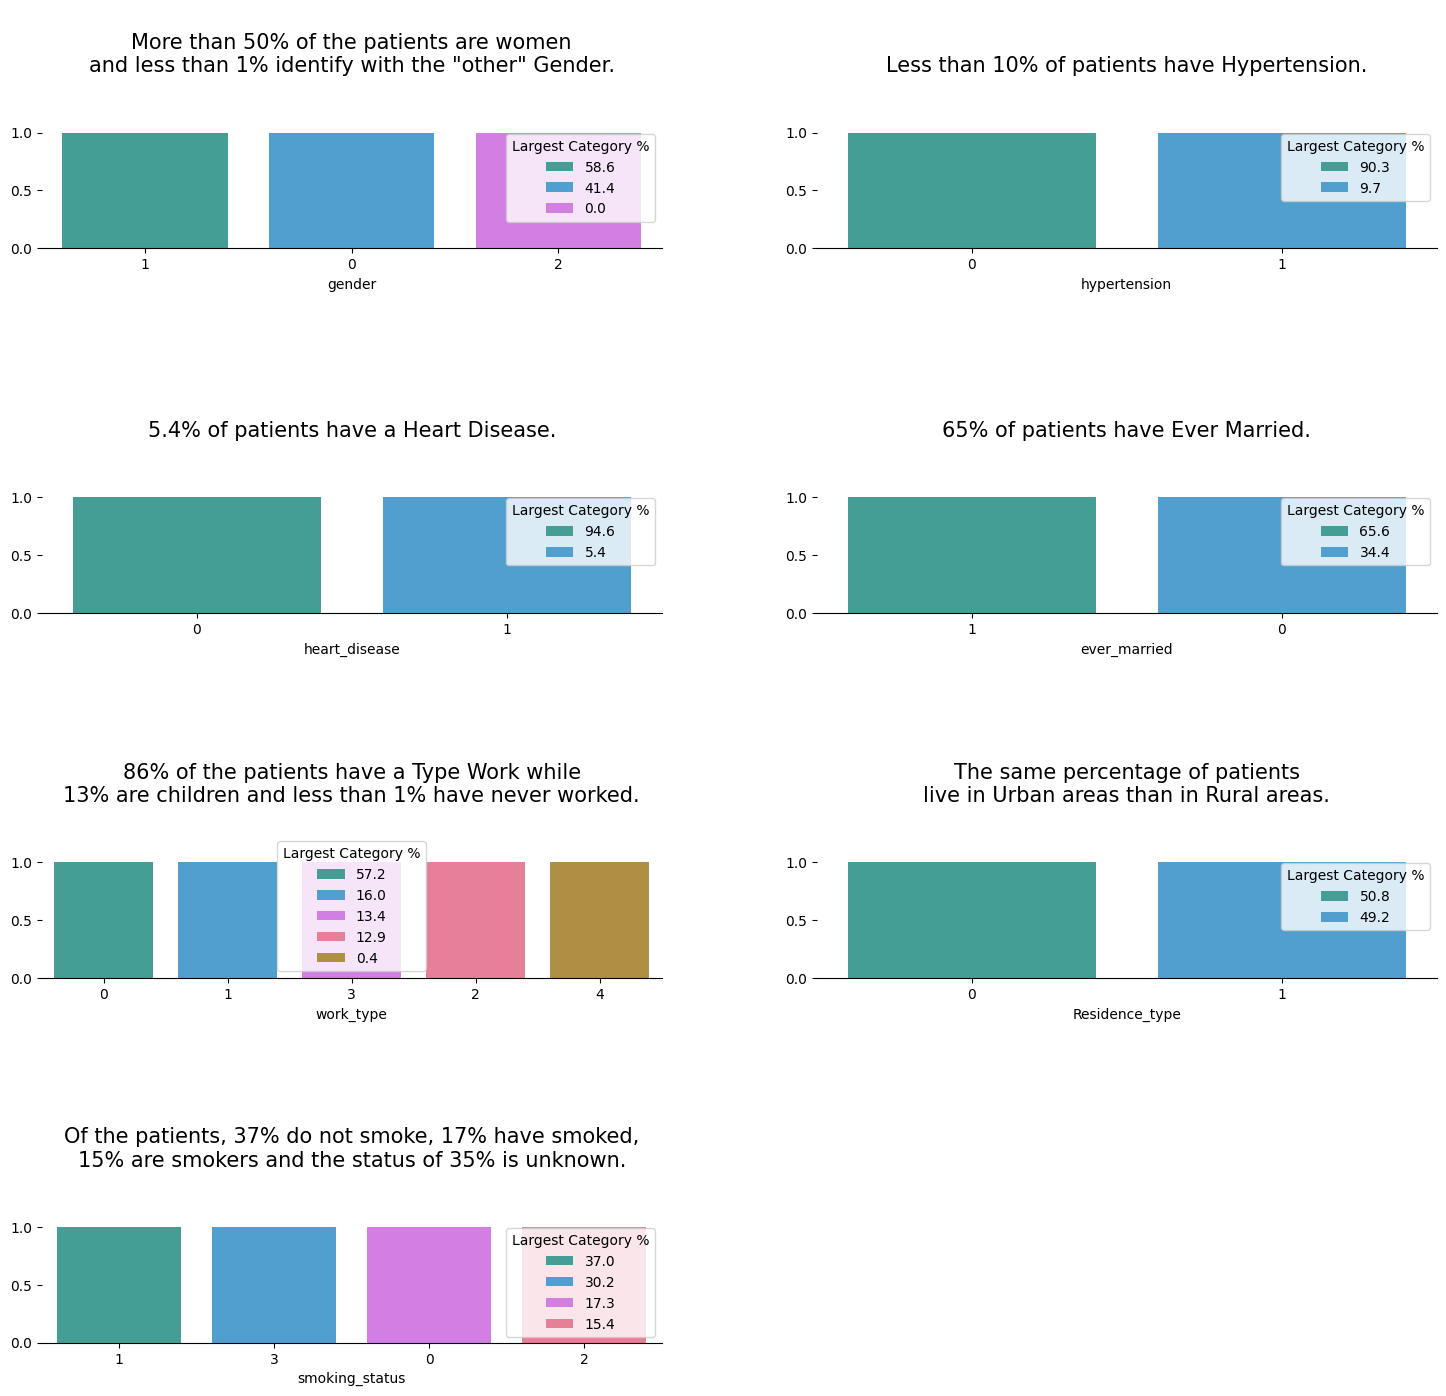

In [936]:
# Categorical Features (Delete Target Because it's a Features of Type "int64").
features_cat = df_median.select_dtypes(include=['object', 'int64']).columns
features_cat = features_cat.drop(['stroke'])


# Plot Description.
description = [str(f'\nMore than 50% of the patients are women\nand less than 1% identify with the "other" Gender.\n\n'),
               str(f'Less than 10% of patients have Hypertension.\n\n'),
               str(f'5.4% of patients have a Heart Disease.\n\n'),
               str(f'65% of patients have Ever Married.\n\n'),
               str(f'86% of the patients have a Type Work while\n13% are children and less than 1% have never worked.\n\n'),
               str(f'The same percentage of patients\nlive in Urban areas than in Rural areas.\n\n'),
               str(f'Of the patients, 37% do not smoke, 17% have smoked,\n15% are smokers and the status of 35% is unknown.\n\n')]

# Grid Plot.
fig = plt.figure(figsize=(18,30))
gs =  gridspec.GridSpec(7,2)
gs.update(wspace=0.25, hspace=2.0)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_cat.values):
    ax = plt.subplot(gs[i])
    sns.countplot(df_median[j], palette=palette, order=[x for x in df_median[j].value_counts().index])
    ax.set_title(description[i], fontsize=15)
    ax.legend([((x/len(df_median)*100).round(1)) for x in df_median[j].value_counts().values], title='Largest Category %')
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')
plt.show()

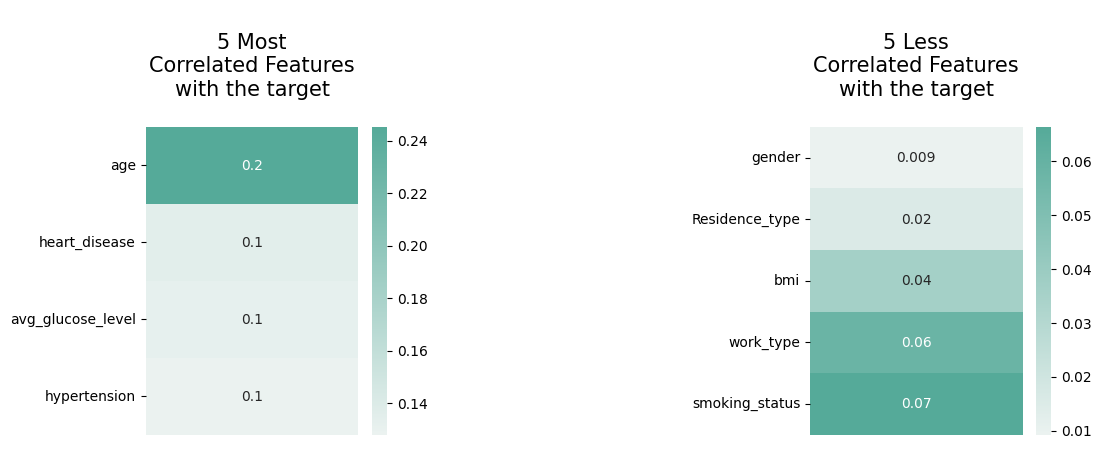

In [937]:
df_corr = abs(df_median.corr())


# DF with the features with the highest correlation and the target is removed.
corr_higher = pd.DataFrame(df_corr['stroke'].sort_values(ascending=False)).head()
corr_higher = corr_higher.drop('stroke', axis=0)

# DF with the features with less correlation.
corr_less = pd.DataFrame(df_corr['stroke'].sort_values()).head()

# List of DFs of Correlations
corr_ls = [corr_higher, corr_less]

# Plot Description.
description = [str(f'\n5 Most\nCorrelated Features\nwith the target\n'), str(f'5 Less\nCorrelated Features\nwith the target\n')]

# Grid Plot.
fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=1.5, hspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(corr_ls):
    ax = plt.subplot(gs[i])
    sns.heatmap(corr_ls[i], annot=True, fmt='.1g', cmap=palette_matrix, cbar=True)
    ax.set_title(description[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)
plt.show()

In [938]:
X = df_median.drop('stroke', axis=1)
y = df_median['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [939]:
smote =  SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

In [940]:
model1 = AdaBoostClassifier()
model2 = RandomForestClassifier()
model3 = XGBClassifier()

In [941]:
model1.fit(X_train, y_train)


AdaBoostClassifier()

In [942]:
model2.fit(X_train, y_train)


RandomForestClassifier()

In [943]:
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [944]:
ada_predictions = model1.predict(X_test)


In [945]:
rf_predictions = model2.predict(X_test)


In [946]:
xgb_predictions = model3.predict(X_test)

In [947]:
X_pred=model1.predict(X_test)
accuracy = accuracy_score(y_test, X_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, X_pred))
print(confusion_matrix(y_test, X_pred))

Accuracy: 0.8137305699481865
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1930
           1       0.83      0.79      0.81      1930

    accuracy                           0.81      3860
   macro avg       0.81      0.81      0.81      3860
weighted avg       0.81      0.81      0.81      3860

[[1611  319]
 [ 400 1530]]


In [948]:
X_pred=model2.predict(X_test)
accuracy = accuracy_score(y_test, X_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, X_pred))
print(confusion_matrix(y_test, X_pred))

Accuracy: 0.7090673575129534
              precision    recall  f1-score   support

           0       0.64      0.95      0.76      1930
           1       0.90      0.47      0.62      1930

    accuracy                           0.71      3860
   macro avg       0.77      0.71      0.69      3860
weighted avg       0.77      0.71      0.69      3860

[[1827  103]
 [1020  910]]


In [949]:
X_pred=model3.predict(X_test)
accuracy = accuracy_score(y_test, X_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, X_pred))
print(confusion_matrix(y_test, X_pred))

Accuracy: 0.7424870466321244
              precision    recall  f1-score   support

           0       0.67      0.94      0.79      1930
           1       0.91      0.54      0.68      1930

    accuracy                           0.74      3860
   macro avg       0.79      0.74      0.73      3860
weighted avg       0.79      0.74      0.73      3860

[[1822  108]
 [ 886 1044]]


In [950]:
new_data = {
    'gender': 0,  # Male
    'age': 81,
    'hypertension': 0,  # Has hypertension
    'heart_disease': 0,  # No heart disease
    'ever_married': 0,  # Yes
    'work_type': 0,  # Private job
    'Residence_type': 0,  # Urban
    'avg_glucose_level': 186.21,
    'bmi': 29.0,
    'smoking_status': 0  # Formerly smoked  
}

prediction = model1.predict(pd.DataFrame([new_data]))
if prediction[0] == 0:
    print("No stroke predicted.")
else:
    print("Stroke predicted.")

Stroke predicted.


In [951]:
# Save the model to a file
joblib.dump(model1, 'ada_boost_model.pkl')

['ada_boost_model.pkl']